In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [2]:
url = 'Dataset/'

In [3]:
# dataset_A = url + 'Dataset C.zip'
# with ZipFile(dataset_A, 'r') as zip:
#   zip.extractall()

In [4]:
PATH = 'Dataset/'
data_labels = pd.read_csv(PATH + 'training-c.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(24298, 2)


,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7


In [5]:
# TRAIN_PATH = url + 'Train'
# os.mkdir(TRAIN_PATH)

# def processImages(folder_name):
#   src = PATH + folder_name + '/'
#   dir_folders = os.listdir(src)
#   for dir_name in dir_folders:
#     file_name = os.path.join(src, dir_name)
#     if os.path.isfile(file_name):
#       shutil.copy(file_name, TRAIN_PATH) 

# processImages('training-a')

In [6]:
TRAIN_PATH = url + 'training-c'


In [71]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        print(image.shape)
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [73]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  24298


In [75]:
train_data[0]

AttributeError: shape

# **Base Parameters**

In [30]:
batch_size = 250
num_iters = 25000
input_dim = 28*28
num_hidden = 320
output_dim = 10

learning_rate = 0.028

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

257


In [31]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
# np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:78
Test dataloader:20


In [32]:
df = pd.DataFrame(train_idx, columns = ['Column_A'])
print(train_data)

In [33]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
#         self.softmax_1 = nn.Softmax(dim=1)
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Softmax(dim=0)
#         self.softmax_2 = nn.Softmax(dim=1)
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
#         self.softmax_3 = nn.Softmax(dim=1)
 
#         self.linear_4 = nn.Linear(num_hidden, num_hidden)
#         self.relu_4 = nn.ReLU()
#         self.softmax_4 = nn.Softmax(dim=1)
 
#         self.linear_5= nn.Linear(num_hidden, num_hidden)
#         self.relu_5= nn.ReLU()
#         self.softmax_5 = nn.Softmax(dim=1)
 
#         self.linear_6 = nn.Linear(num_hidden, num_hidden)
#         self.relu_6 = nn.ReLU()
        
#         self.linear_7 = nn.Linear(num_hidden, num_hidden)
#         self.relu_7 = nn.ReLU()
        
#         self.linear_8 = nn.Linear(num_hidden, num_hidden)
#         self.relu_8 = nn.ReLU()
        
#         self.linear_9 = nn.Linear(num_hidden, num_hidden)
#         self.relu_9 = nn.ReLU()

#         self.linear_10 = nn.Linear(num_hidden, num_hidden)
#         self.relu_10 = nn.ReLU()

        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
#         out  = self.linear_4(out)
#         out = self.relu_4(out)
 
#         out  = self.linear_5(out)
#         out = self.relu_5(out)
 
#         out  = self.linear_6(out)
#         out = self.relu_6(out)
        
#         out  = self.linear_7(out)
#         out = self.relu_7(out)
        
#         out  = self.linear_8(out)
#         out = self.relu_8(out)
        
#         out  = self.linear_9(out)
#         out = self.relu_9(out)
        
#         out  = self.linear_10(out)
#         out = self.relu_10(out)
        
        probas  = self.linear_out(out)
        return probas

In [34]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=320, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=320, out_features=320, bias=True)
  (relu_2): Softmax(dim=0)
  (linear_3): Linear(in_features=320, out_features=320, bias=True)
  (relu_3): ReLU()
  (linear_out): Linear(in_features=320, out_features=10, bias=True)
)

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)

In [36]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 2.2636895179748535. Accuracy: 13.994649104754064
Iteration: 20. Loss: 2.190608263015747. Accuracy: 20.971393290800577
Iteration: 30. Loss: 2.090768814086914. Accuracy: 24.325993002675446
Iteration: 40. Loss: 1.9588139057159424. Accuracy: 26.960279892982093
Iteration: 50. Loss: 1.9669454097747803. Accuracy: 31.487960485696647
Iteration: 60. Loss: 1.8902908563613892. Accuracy: 32.084791109281745
Iteration: 70. Loss: 1.8523980379104614. Accuracy: 34.204568841325376
Epoch:  2
Iteration: 80. Loss: 1.750015139579773. Accuracy: 36.55073060300473
Iteration: 90. Loss: 1.6811045408248901. Accuracy: 37.806132949166496
Iteration: 100. Loss: 1.6960127353668213. Accuracy: 39.59662481992179
Iteration: 110. Loss: 1.7458480596542358. Accuracy: 40.27577690882898
Iteration: 120. Loss: 1.6515283584594727. Accuracy: 42.683679769499896
Iteration: 130. Loss: 1.6818969249725342. Accuracy: 42.74542086849146
Iteration: 140. Loss: 1.5466670989990234. Accuracy: 42.35439390821156
Ite

Iteration: 1160. Loss: 0.6129307746887207. Accuracy: 73.2249434039926
Iteration: 1170. Loss: 0.5675815939903259. Accuracy: 74.37744391850175
Epoch:  16
Iteration: 1180. Loss: 0.5711075663566589. Accuracy: 74.64498868079852
Iteration: 1190. Loss: 0.4903482496738434. Accuracy: 74.5215064828154
Iteration: 1200. Loss: 0.6072723865509033. Accuracy: 74.39802428483227
Iteration: 1210. Loss: 0.609908938407898. Accuracy: 73.92467585923029
Iteration: 1220. Loss: 0.5364480018615723. Accuracy: 75.03601564107841
Iteration: 1230. Loss: 0.5170813798904419. Accuracy: 75.07717637373945
Iteration: 1240. Loss: 0.5514064431190491. Accuracy: 74.27454208684915
Epoch:  17
Iteration: 1250. Loss: 0.6209354400634766. Accuracy: 74.45976538382384
Iteration: 1260. Loss: 0.5690749883651733. Accuracy: 74.3157028195102
Iteration: 1270. Loss: 0.537690281867981. Accuracy: 74.58324758180696
Iteration: 1280. Loss: 0.5313950181007385. Accuracy: 75.26239967071413
Iteration: 1290. Loss: 0.5960158109664917. Accuracy: 75.1183

Iteration: 2300. Loss: 0.4292488396167755. Accuracy: 78.92570487754682
Iteration: 2310. Loss: 0.4569988548755646. Accuracy: 79.64601769911505
Iteration: 2320. Loss: 0.4450914263725281. Accuracy: 79.15208890718255
Iteration: 2330. Loss: 0.39532747864723206. Accuracy: 78.92570487754682
Iteration: 2340. Loss: 0.403451144695282. Accuracy: 79.1109281745215
Epoch:  31
Iteration: 2350. Loss: 0.39358997344970703. Accuracy: 79.02860670919942
Iteration: 2360. Loss: 0.4522708058357239. Accuracy: 78.6993208479111
Iteration: 2370. Loss: 0.3002357482910156. Accuracy: 78.43177608561433
Iteration: 2380. Loss: 0.3996340036392212. Accuracy: 79.13150854085202
Iteration: 2390. Loss: 0.40369194746017456. Accuracy: 78.37003498662276
Iteration: 2400. Loss: 0.3844541907310486. Accuracy: 79.33731220415723
Iteration: 2410. Loss: 0.3014233112335205. Accuracy: 79.17266927351307
Epoch:  32
Iteration: 2420. Loss: 0.4044056534767151. Accuracy: 79.02860670919942
Iteration: 2430. Loss: 0.3576957583427429. Accuracy: 78

Iteration: 3430. Loss: 0.33987340331077576. Accuracy: 80.7985182136242
Epoch:  45
Iteration: 3440. Loss: 0.2941630184650421. Accuracy: 80.57213418398848
Iteration: 3450. Loss: 0.3444763422012329. Accuracy: 80.48981271866639
Iteration: 3460. Loss: 0.2701345682144165. Accuracy: 80.11936612471702
Iteration: 3470. Loss: 0.3058708608150482. Accuracy: 80.6956163819716
Iteration: 3480. Loss: 0.24914543330669403. Accuracy: 80.57213418398848
Iteration: 3490. Loss: 0.24857749044895172. Accuracy: 80.98374151059889
Iteration: 3500. Loss: 0.28591522574424744. Accuracy: 80.90142004527681
Iteration: 3510. Loss: 0.35032919049263. Accuracy: 80.73677711463264
Epoch:  46
Iteration: 3520. Loss: 0.29566702246665955. Accuracy: 80.38691088701378
Iteration: 3530. Loss: 0.2978677749633789. Accuracy: 81.02490224325993
Iteration: 3540. Loss: 0.26655012369155884. Accuracy: 80.46923235233587
Iteration: 3550. Loss: 0.23179666697978973. Accuracy: 80.81909857995473
Iteration: 3560. Loss: 0.24862313270568848. Accuracy

Iteration: 4560. Loss: 0.2257622331380844. Accuracy: 81.04548260959045
Iteration: 4570. Loss: 0.21554376184940338. Accuracy: 81.55999176785346
Iteration: 4580. Loss: 0.24341830611228943. Accuracy: 81.10722370858201
Iteration: 4590. Loss: 0.21787261962890625. Accuracy: 80.92200041160733
Iteration: 4600. Loss: 0.2942141890525818. Accuracy: 81.33360773821774
Epoch:  60
Iteration: 4610. Loss: 0.22769907116889954. Accuracy: 81.41592920353982
Iteration: 4620. Loss: 0.22641593217849731. Accuracy: 81.76579543115868
Iteration: 4630. Loss: 0.24563919007778168. Accuracy: 81.82753653015024
Iteration: 4640. Loss: 0.24627135694026947. Accuracy: 81.2924470055567
Iteration: 4650. Loss: 0.22976015508174896. Accuracy: 81.2924470055567
Iteration: 4660. Loss: 0.303460955619812. Accuracy: 80.77793784729369
Iteration: 4670. Loss: 0.2934751510620117. Accuracy: 81.45708993620086
Iteration: 4680. Loss: 0.34125062823295593. Accuracy: 81.27186663922618
Epoch:  61
Iteration: 4690. Loss: 0.1618252545595169. Accura

Iteration: 5690. Loss: 0.20858369767665863. Accuracy: 82.05392055978596
Epoch:  74
Iteration: 5700. Loss: 0.23346517980098724. Accuracy: 81.47767030253138
Iteration: 5710. Loss: 0.1806437075138092. Accuracy: 81.93043836180284
Iteration: 5720. Loss: 0.18893398344516754. Accuracy: 81.90985799547232
Iteration: 5730. Loss: 0.2265467792749405. Accuracy: 81.84811689648076
Iteration: 5740. Loss: 0.19003921747207642. Accuracy: 81.8892776291418
Iteration: 5750. Loss: 0.15481430292129517. Accuracy: 81.80695616381972
Iteration: 5760. Loss: 0.22506622970104218. Accuracy: 81.80695616381972
Iteration: 5770. Loss: 0.1749148666858673. Accuracy: 82.03334019345544
Epoch:  75
Iteration: 5780. Loss: 0.2242778241634369. Accuracy: 81.580572134184
Iteration: 5790. Loss: 0.21601545810699463. Accuracy: 82.07450092611649
Iteration: 5800. Loss: 0.23263098299503326. Accuracy: 81.55999176785346
Iteration: 5810. Loss: 0.19594384729862213. Accuracy: 81.95101872813336
Iteration: 5820. Loss: 0.15192179381847382. Accur

Iteration: 6820. Loss: 0.1550518125295639. Accuracy: 82.07450092611649
Iteration: 6830. Loss: 0.13256517052650452. Accuracy: 81.74521506482816
Iteration: 6840. Loss: 0.1728464663028717. Accuracy: 82.34204568841325
Iteration: 6850. Loss: 0.17859038710594177. Accuracy: 81.93043836180284
Iteration: 6860. Loss: 0.15481486916542053. Accuracy: 81.86869726281128
Epoch:  89
Iteration: 6870. Loss: 0.16144512593746185. Accuracy: 81.7863757974892
Iteration: 6880. Loss: 0.20906025171279907. Accuracy: 82.44494752006585
Iteration: 6890. Loss: 0.15325407683849335. Accuracy: 82.15682239143857
Iteration: 6900. Loss: 0.13984888792037964. Accuracy: 83.24758180695616
Iteration: 6910. Loss: 0.1420111209154129. Accuracy: 82.75365301502367
Iteration: 6920. Loss: 0.16234251856803894. Accuracy: 82.46552788639637
Iteration: 6930. Loss: 0.15343526005744934. Accuracy: 82.73307264869315
Iteration: 6940. Loss: 0.10409268736839294. Accuracy: 82.32146532208273
Epoch:  90
Iteration: 6950. Loss: 0.16562485694885254. Ac

Iteration: 7950. Loss: 0.16987164318561554. Accuracy: 82.21856349043013
Epoch:  103
Iteration: 7960. Loss: 0.1130862608551979. Accuracy: 82.23914385676065
Iteration: 7970. Loss: 0.1785508692264557. Accuracy: 82.42436715373533
Iteration: 7980. Loss: 0.1403544396162033. Accuracy: 82.17740275776909
Iteration: 7990. Loss: 0.1199454516172409. Accuracy: 82.50668861905741
Iteration: 8000. Loss: 0.13529837131500244. Accuracy: 82.91829594566784
Iteration: 8010. Loss: 0.14341141283512115. Accuracy: 82.34204568841325
Iteration: 8020. Loss: 0.13388830423355103. Accuracy: 82.17740275776909
Iteration: 8030. Loss: 0.16287057101726532. Accuracy: 81.74521506482816
Epoch:  104
Iteration: 8040. Loss: 0.1340811848640442. Accuracy: 81.97159909446388
Iteration: 8050. Loss: 0.147556871175766. Accuracy: 82.25972422309117
Iteration: 8060. Loss: 0.14329884946346283. Accuracy: 82.46552788639637
Iteration: 8070. Loss: 0.13780492544174194. Accuracy: 82.5890100843795
Iteration: 8080. Loss: 0.157669335603714. Accura

Iteration: 9080. Loss: 0.1361095905303955. Accuracy: 82.23914385676065
Iteration: 9090. Loss: 0.14644590020179749. Accuracy: 82.19798312409961
Iteration: 9100. Loss: 0.16147765517234802. Accuracy: 82.54784935171845
Iteration: 9110. Loss: 0.1840386986732483. Accuracy: 82.60959045071002
Iteration: 9120. Loss: 0.20587779581546783. Accuracy: 82.71249228236263
Epoch:  118
Iteration: 9130. Loss: 0.09752485156059265. Accuracy: 82.25972422309117
Iteration: 9140. Loss: 0.15999099612236023. Accuracy: 82.42436715373533
Iteration: 9150. Loss: 0.13111157715320587. Accuracy: 82.63017081704054
Iteration: 9160. Loss: 0.1026228815317154. Accuracy: 82.44494752006585
Iteration: 9170. Loss: 0.12907589972019196. Accuracy: 82.4861082527269
Iteration: 9180. Loss: 0.15317659080028534. Accuracy: 82.67133154970159
Iteration: 9190. Loss: 0.12660899758338928. Accuracy: 82.83597448034575
Iteration: 9200. Loss: 0.1740354746580124. Accuracy: 82.9800370446594
Epoch:  119
Iteration: 9210. Loss: 0.13195733726024628. Ac

Iteration: 10200. Loss: 0.13217724859714508. Accuracy: 82.44494752006585
Iteration: 10210. Loss: 0.1200595572590828. Accuracy: 82.63017081704054
Epoch:  132
Iteration: 10220. Loss: 0.12314250320196152. Accuracy: 82.93887631199836
Iteration: 10230. Loss: 0.12321808189153671. Accuracy: 82.21856349043013
Iteration: 10240. Loss: 0.09905415028333664. Accuracy: 82.60959045071002
Iteration: 10250. Loss: 0.10582955181598663. Accuracy: 82.7742333813542
Iteration: 10260. Loss: 0.11475372314453125. Accuracy: 82.56842971804898
Iteration: 10270. Loss: 0.09701310843229294. Accuracy: 82.38320642107429
Iteration: 10280. Loss: 0.1337454617023468. Accuracy: 82.95945667832888
Iteration: 10290. Loss: 0.12734363973140717. Accuracy: 82.69191191603211
Epoch:  133
Iteration: 10300. Loss: 0.09792941808700562. Accuracy: 82.91829594566784
Iteration: 10310. Loss: 0.12007268518209457. Accuracy: 82.60959045071002
Iteration: 10320. Loss: 0.1275833696126938. Accuracy: 82.65075118337107
Iteration: 10330. Loss: 0.11009

Iteration: 11310. Loss: 0.1331295371055603. Accuracy: 82.91829594566784
Epoch:  146
Iteration: 11320. Loss: 0.09979743510484695. Accuracy: 82.07450092611649
Iteration: 11330. Loss: 0.08484183996915817. Accuracy: 82.69191191603211
Iteration: 11340. Loss: 0.125191792845726. Accuracy: 82.25972422309117
Iteration: 11350. Loss: 0.10702206194400787. Accuracy: 82.50668861905741
Iteration: 11360. Loss: 0.11791528761386871. Accuracy: 82.52726898538793
Iteration: 11370. Loss: 0.1158292293548584. Accuracy: 82.52726898538793
Iteration: 11380. Loss: 0.11689972132444382. Accuracy: 83.02119777732044
Epoch:  147
Iteration: 11390. Loss: 0.09326285123825073. Accuracy: 82.89771557933732
Iteration: 11400. Loss: 0.09160928428173065. Accuracy: 82.9800370446594
Iteration: 11410. Loss: 0.07387157529592514. Accuracy: 82.5890100843795
Iteration: 11420. Loss: 0.10748165845870972. Accuracy: 83.00061741098992
Iteration: 11430. Loss: 0.0904148742556572. Accuracy: 82.75365301502367
Iteration: 11440. Loss: 0.13795183

Iteration: 12420. Loss: 0.08277159929275513. Accuracy: 82.83597448034575
Iteration: 12430. Loss: 0.07937141507863998. Accuracy: 82.9800370446594
Iteration: 12440. Loss: 0.11465831845998764. Accuracy: 82.7742333813542
Iteration: 12450. Loss: 0.1288938969373703. Accuracy: 82.40378678740481
Iteration: 12460. Loss: 0.09119533747434616. Accuracy: 82.65075118337107
Iteration: 12470. Loss: 0.09085345268249512. Accuracy: 83.47396583659189
Iteration: 12480. Loss: 0.1294371336698532. Accuracy: 82.40378678740481
Epoch:  161
Iteration: 12490. Loss: 0.15277573466300964. Accuracy: 82.71249228236263
Iteration: 12500. Loss: 0.10748642683029175. Accuracy: 82.63017081704054
Iteration: 12510. Loss: 0.06952467560768127. Accuracy: 83.16526034163408
Iteration: 12520. Loss: 0.1260654628276825. Accuracy: 82.5890100843795
Iteration: 12530. Loss: 0.08644365519285202. Accuracy: 82.56842971804898
Iteration: 12540. Loss: 0.07531948387622833. Accuracy: 82.44494752006585
Iteration: 12550. Loss: 0.09570731222629547. 

Iteration: 13530. Loss: 0.07660360634326935. Accuracy: 83.26816217328668
Iteration: 13540. Loss: 0.08336670696735382. Accuracy: 82.63017081704054
Iteration: 13550. Loss: 0.12384475767612457. Accuracy: 82.7742333813542
Iteration: 13560. Loss: 0.15363474190235138. Accuracy: 82.40378678740481
Iteration: 13570. Loss: 0.0712408795952797. Accuracy: 83.3916443712698
Epoch:  175
Iteration: 13580. Loss: 0.09049451351165771. Accuracy: 82.75365301502367
Iteration: 13590. Loss: 0.07602277398109436. Accuracy: 83.16526034163408
Iteration: 13600. Loss: 0.08846946805715561. Accuracy: 83.02119777732044
Iteration: 13610. Loss: 0.1331387609243393. Accuracy: 82.9800370446594
Iteration: 13620. Loss: 0.08310822397470474. Accuracy: 82.8771352130068
Iteration: 13630. Loss: 0.06401782482862473. Accuracy: 83.02119777732044
Iteration: 13640. Loss: 0.08765207976102829. Accuracy: 83.082938876312
Iteration: 13650. Loss: 0.10969769209623337. Accuracy: 82.89771557933732
Epoch:  176
Iteration: 13660. Loss: 0.068485893

Iteration: 14640. Loss: 0.05277561768889427. Accuracy: 82.50668861905741
Iteration: 14650. Loss: 0.06290562450885773. Accuracy: 83.35048363860876
Iteration: 14660. Loss: 0.083629310131073. Accuracy: 82.50668861905741
Epoch:  189
Iteration: 14670. Loss: 0.0709942877292633. Accuracy: 82.9800370446594
Iteration: 14680. Loss: 0.11188854277133942. Accuracy: 83.00061741098992
Iteration: 14690. Loss: 0.06970520317554474. Accuracy: 82.89771557933732
Iteration: 14700. Loss: 0.07003691792488098. Accuracy: 82.79481374768471
Iteration: 14710. Loss: 0.06673814356327057. Accuracy: 83.51512656925293
Iteration: 14720. Loss: 0.046249523758888245. Accuracy: 83.30932290594772
Iteration: 14730. Loss: 0.13054993748664856. Accuracy: 83.10351924264252
Iteration: 14740. Loss: 0.07519842684268951. Accuracy: 83.02119777732044
Epoch:  190
Iteration: 14750. Loss: 0.06159624457359314. Accuracy: 83.02119777732044
Iteration: 14760. Loss: 0.07767222076654434. Accuracy: 83.082938876312
Iteration: 14770. Loss: 0.054017

Iteration: 15750. Loss: 0.059465620666742325. Accuracy: 82.85655484667627
Epoch:  203
Iteration: 15760. Loss: 0.08468303084373474. Accuracy: 83.51512656925293
Iteration: 15770. Loss: 0.07249565422534943. Accuracy: 82.71249228236263
Iteration: 15780. Loss: 0.061467550694942474. Accuracy: 83.16526034163408
Iteration: 15790. Loss: 0.06219027191400528. Accuracy: 83.49454620292241
Iteration: 15800. Loss: 0.07328159362077713. Accuracy: 83.16526034163408
Iteration: 15810. Loss: 0.07441296428442001. Accuracy: 82.8771352130068
Iteration: 15820. Loss: 0.09632440656423569. Accuracy: 82.54784935171845
Iteration: 15830. Loss: 0.058902475982904434. Accuracy: 83.02119777732044
Epoch:  204
Iteration: 15840. Loss: 0.08942084014415741. Accuracy: 83.61802840090553
Iteration: 15850. Loss: 0.052008435130119324. Accuracy: 82.95945667832888
Iteration: 15860. Loss: 0.06655089557170868. Accuracy: 82.83597448034575
Iteration: 15870. Loss: 0.11261312663555145. Accuracy: 82.75365301502367
Iteration: 15880. Loss: 

Iteration: 16850. Loss: 0.053287193179130554. Accuracy: 83.47396583659189
Iteration: 16860. Loss: 0.06407687813043594. Accuracy: 82.79481374768471
Iteration: 16870. Loss: 0.07393855601549149. Accuracy: 83.082938876312
Iteration: 16880. Loss: 0.04660820588469505. Accuracy: 82.71249228236263
Iteration: 16890. Loss: 0.06165645271539688. Accuracy: 83.53570693558345
Iteration: 16900. Loss: 0.08476386219263077. Accuracy: 83.04177814365096
Iteration: 16910. Loss: 0.058072637766599655. Accuracy: 82.89771557933732
Iteration: 16920. Loss: 0.06015227735042572. Accuracy: 82.71249228236263
Epoch:  218
Iteration: 16930. Loss: 0.04838874191045761. Accuracy: 82.7742333813542
Iteration: 16940. Loss: 0.056804366409778595. Accuracy: 82.40378678740481
Iteration: 16950. Loss: 0.09395323693752289. Accuracy: 83.16526034163408
Iteration: 16960. Loss: 0.0422174371778965. Accuracy: 82.7742333813542
Iteration: 16970. Loss: 0.07197082787752151. Accuracy: 83.04177814365096
Iteration: 16980. Loss: 0.056659244000911

Iteration: 17960. Loss: 0.0737629234790802. Accuracy: 82.73307264869315
Iteration: 17970. Loss: 0.060514189302921295. Accuracy: 82.75365301502367
Iteration: 17980. Loss: 0.04647081717848778. Accuracy: 82.50668861905741
Iteration: 17990. Loss: 0.05511218681931496. Accuracy: 83.35048363860876
Iteration: 18000. Loss: 0.0627567321062088. Accuracy: 83.16526034163408
Iteration: 18010. Loss: 0.0666949599981308. Accuracy: 82.8771352130068
Epoch:  232
Iteration: 18020. Loss: 0.055410970002412796. Accuracy: 83.1858407079646
Iteration: 18030. Loss: 0.08105534315109253. Accuracy: 83.20642107429512
Iteration: 18040. Loss: 0.046787917613983154. Accuracy: 82.44494752006585
Iteration: 18050. Loss: 0.05296536535024643. Accuracy: 83.49454620292241
Iteration: 18060. Loss: 0.06215253844857216. Accuracy: 83.2887425396172
Iteration: 18070. Loss: 0.06159178912639618. Accuracy: 82.81539411401523
Iteration: 18080. Loss: 0.046807918697595596. Accuracy: 82.9800370446594
Iteration: 18090. Loss: 0.0424651689827442

Iteration: 19070. Loss: 0.05020684748888016. Accuracy: 83.12409960897304
Iteration: 19080. Loss: 0.06249602511525154. Accuracy: 83.10351924264252
Iteration: 19090. Loss: 0.04011252522468567. Accuracy: 83.24758180695616
Iteration: 19100. Loss: 0.07855810970067978. Accuracy: 83.20642107429512
Iteration: 19110. Loss: 0.06992114335298538. Accuracy: 83.02119777732044
Epoch:  246
Iteration: 19120. Loss: 0.03522692993283272. Accuracy: 83.3916443712698
Iteration: 19130. Loss: 0.05849722772836685. Accuracy: 82.8771352130068
Iteration: 19140. Loss: 0.03607024624943733. Accuracy: 83.43280510393085
Iteration: 19150. Loss: 0.0646340474486351. Accuracy: 82.9800370446594
Iteration: 19160. Loss: 0.05312579497694969. Accuracy: 83.74151059888867
Iteration: 19170. Loss: 0.04782581701874733. Accuracy: 83.00061741098992
Iteration: 19180. Loss: 0.028240544721484184. Accuracy: 83.49454620292241
Epoch:  247
Iteration: 19190. Loss: 0.046454284340143204. Accuracy: 82.85655484667627
Iteration: 19200. Loss: 0.058

In [76]:
print(accuracy)

82.93887631199836


In [43]:
torch.save(model.state_dict(), 'model_base_good_'+str(accuracy)+'_3_layer_250_320_25k.pkl')

[2.2636895179748535, 2.190608263015747, 2.090768814086914, 1.9588139057159424, 1.9669454097747803, 1.8902908563613892, 1.8523980379104614, 1.750015139579773, 1.6811045408248901, 1.6960127353668213, 1.7458480596542358, 1.6515283584594727, 1.6818969249725342, 1.5466670989990234, 1.6014963388442993, 1.553986668586731, 1.410284399986267, 1.4362008571624756, 1.458068609237671, 1.3492488861083984, 1.4140806198120117, 1.4449752569198608, 1.288587212562561, 1.33138108253479, 1.3331373929977417, 1.30010986328125, 1.207910180091858, 1.342887043952942, 1.3380417823791504, 1.2238872051239014, 1.2768149375915527, 1.188870906829834, 1.1716017723083496, 1.1630626916885376, 1.1340383291244507, 1.1328693628311157, 1.0851918458938599, 1.088268756866455, 1.0289198160171509, 1.1082156896591187, 0.9819430112838745, 1.1105529069900513, 1.0939626693725586, 0.9589290618896484, 1.1048420667648315, 0.9888250827789307, 1.0184664726257324, 1.0731167793273926, 1.0415971279144287, 1.043196439743042, 0.8652507066726

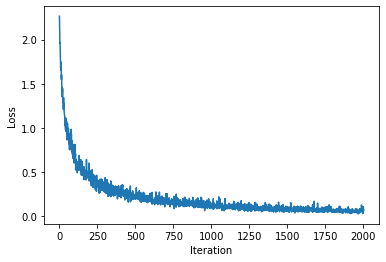

In [38]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

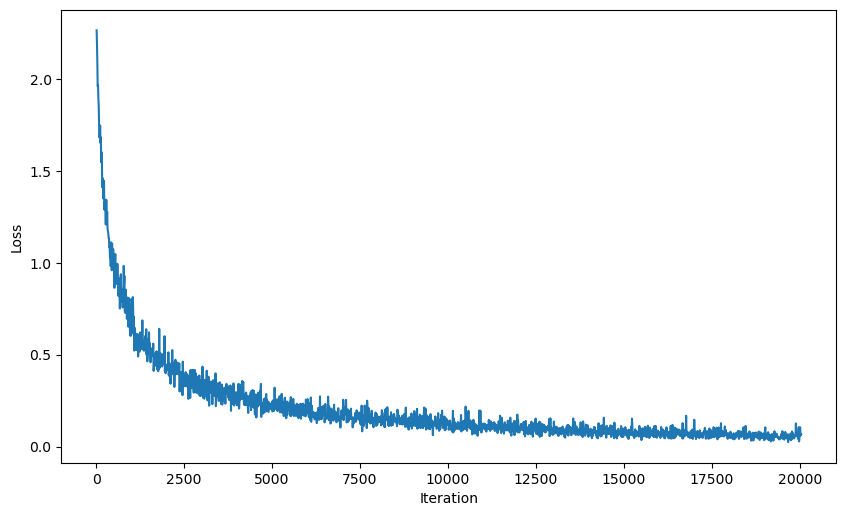

In [50]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=100)
y = range(10,20041,10)
plt.plot(y,iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

In [77]:
from sklearn.metrics import accuracy_score

def evaluate_model(test_dl, model):
    model.eval() 
    total = 0
    correct = 0
    for images, labels in test_dl:
               
        images = images.view(-1, 28*28).to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        
        plt.imshow(images[0].reshape(28, 28, 1), cmap='gray')
        plt.title(f'Prediction: {predicted[0]} - Actual target: {labels[0]}')
        plt.show()

        total += labels.size(0)

        if torch.cuda.is_available():
            correct += (predicted.cpu() == labels.cpu()).sum() 
        else:
            correct += (predicted == labels).sum()

    acc = 100 * correct.item() / total
    return acc

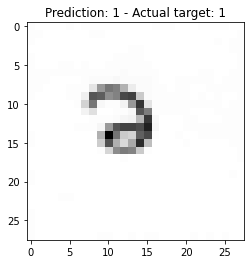

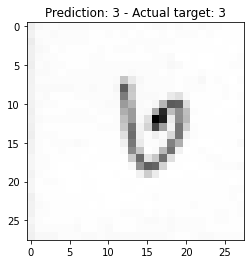

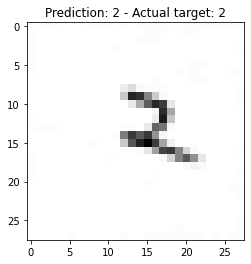

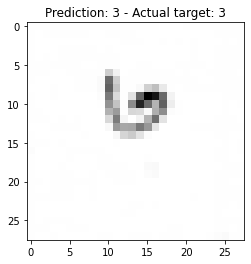

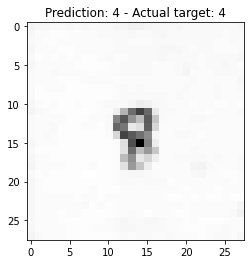

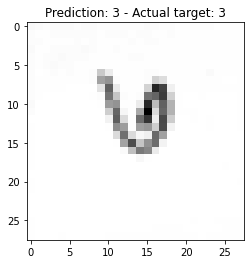

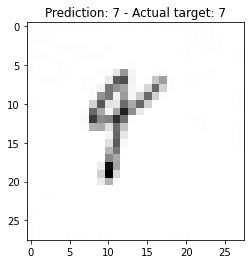

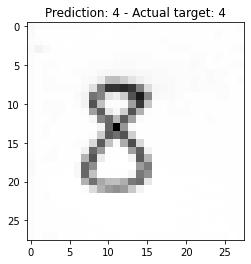

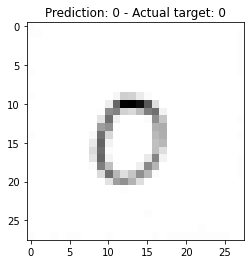

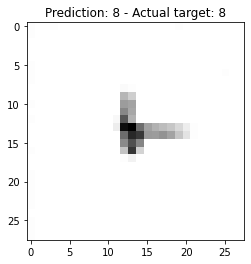

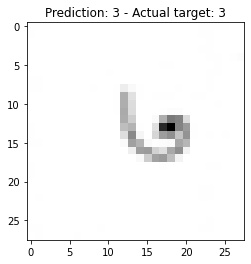

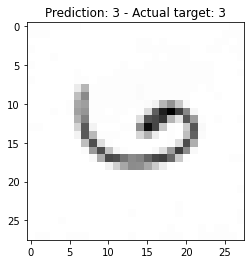

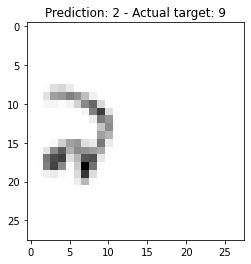

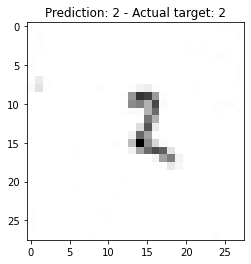

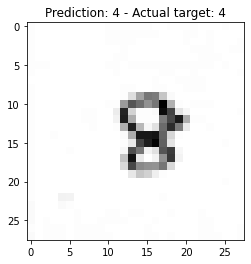

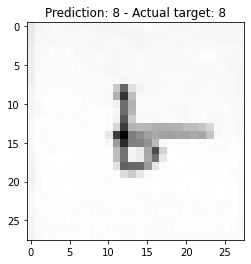

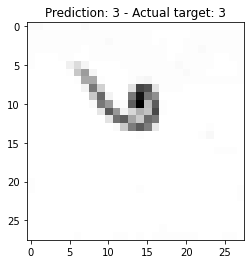

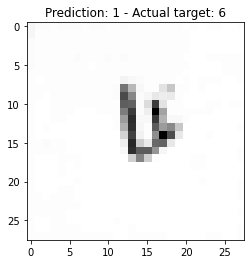

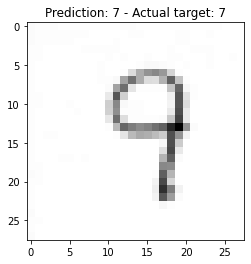

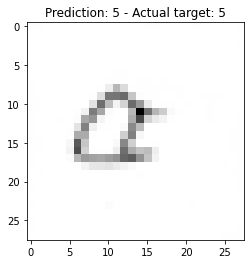

Accuracy: 83.145


In [78]:
acc = evaluate_model(test_loader, model)
print('Accuracy: %.3f' % acc)